# Lendo dados de geociência

## License

All content can be freely used and adapted under the terms of the 
[Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)

## Imports

Coloque **todos** os `import` na célula abaixo. Não se esqueça do `%matplotlib inline` para que os gráficos apareçam no notebook.

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline


## IMPORTANTE

Agora que vocês sabem técnicas de programação defensiva, eu espero que todo o código que vocês fizerem abaixo utilizem essas técnicas. Crie docstrings para suas funções, cheque as entradas (quando for possível) e cheque as saídas. **Não esqueçam dos comentários**.

## Temperatura no Rio de Janeiro

O arquivo `data/23.31S-42.82W-TAVG-Trend.txt` contém dados de temperatura média mensal para a cidade do Rio de Janeiro. O arquivo também contém médias móveis anual, 5, 10 e 20 anos. Esses dados foram baixados do site Berkeley Earth (http://berkeleyearth.lbl.gov/locations/23.31S-42.82W).

### Tarefa

Faça duas funções, uma que lê os dados de temperatura mensal, outra que lê os dados da média móvel anual.
As duas funções devem:

* Receber como entrada **somente** o nome do arquivo de dados.
* Retornar duas listas: uma com as datas referentes aos dados e outra com os dados de temperatura.
* As datas retornadas devem ser em anos decimais. Ex: Janeiro de 1984 seria 1984.0833333333333 (1984 + 1/12).
* Datas sem valores de temperatura (NaN) devem ser ignoradas (não incluidas nas listas).

Utilize suas funções para carregar os dados e fazer um gráfico da temperatura média mensal e média movel anual pelo tempo.

In [5]:
arquivo = open('data/23.31S-42.82W-TAVG-Trend.txt')

In [171]:
arquivo = open('data/23.31S-42.82W-TAVG-Trend.txt')

data = [] #criamos uma lista para as datas
mes = [] #criamos uma lista para os meses
data_mes = [] #criamos uma lista que contem a soma dos anos com meses em valores decimais
mes_sobredoze = [] #aqui esta a lista dos meses em valores decimais que vamos somar na outra
temp = [] #uma lista para as temperaturas
real_temp = [] #uma lista para as temperaturas reais, baseando-se na media fornecida

for linha in arquivo: #para cada linha do arquivo...
    if linha[0] != "%": #"!=" significa "diferente de"
        split = linha.split() #separamos os componentes da linha
        if len(split) != 0: #excluimos linhas vazias
            if split[2] != "NaN":   #excluimos linhas com NaN
                data.append(float(split[0])) #adicionamos os valores desejados em cada lista
                mes.append(float(split[1]))
                temp.append(float(split[2]))

                
for k in mes: #aqui convertemos os meses em numeros decimais
    k = k/12
    mes_sobredoze.append(float(k))
    
for z in range(len(data)): #aqui somamos os decimais de meses aos anos referentes
    o = data[z] + mes_sobredoze[z]
    data_mes.append(o)
    
for z in range(len(temp)): #aqui somamos as temperaturas a media fornecida
    u = temp[z]+24.01
    real_temp.append(u)
    
arquivo.close()

In [172]:
arquivo = open('data/23.31S-42.82W-TAVG-Trend.txt') #voltamos ao arquivo

data = []
mes = []
data_ano = []
mes_sobredoze = []
temp = []
anual_temp = [] #todo o programa e igual, exceto que agora calcularemos a media anual e salvaremos nesta nova lista

for linha in arquivo: #para cada linha do arquivo...
    if linha[0] != "%": #"!=" significa "diferente de"
        split = linha.split() #separamos os componentes da linha
        if len(split) != 0:
            if split[4] != "NaN":
                data.append(float(split[0]))
                mes.append(float(split[1]))
                temp.append(float(split[4]))

                
for k in mes: #aqui convertemos os meses em numeros decimais
    k = k/12
    mes_sobredoze.append(float(k))
    
for z in range(len(data)): #aqui somamos os decimais de meses aos anos referentes
    o = data[z] + mes_sobredoze[z]
    data_ano.append(o)
    
for z in range(len(temp)):
    u = temp[z]+24.01
    anual_temp.append(u)

    
arquivo.close()

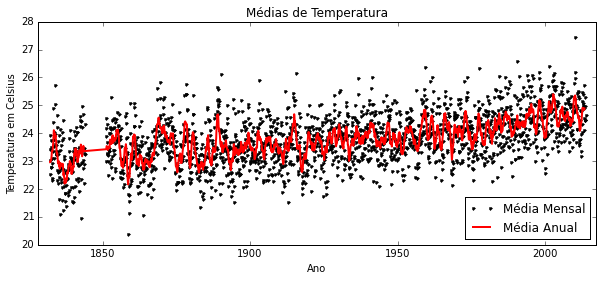

In [173]:
plt.figure(figsize = [10, 4]) #criamos aqui a figura em branco
plt.plot(data_mes, real_temp, '.k', label='Média Mensal') #aqui preenchemos-na com os dados organizados
plt.plot(data_ano, anual_temp, 'r', label='Média Anual', linewidth = 2) #aqui preenchemos-na com os dados organizados
plt.title("Médias de Temperatura") #título
plt.xlabel(u"Ano") #nomeamos o eixo X
plt.ylabel("Temperatura em Celsius") #nomeamos o eixo Y
plt.xlim(1828,2017) #limitamos o eixo x
plt.legend(loc='lower right', fontsize='large')

### Resultado esperado

O gráfico final deve ser parecido com o abaixo:

![images/media-mensal-temp-rio.png](images/media-mensal-temp-rio.png)

### Tarefa

Faça uma função que calcule a temperatura média anual a partir das temperaturas mensais. A sua função deve:

* Receber como entrada a lista das datas e a lista das temperaturas mensais.
* Retornar duas listas: uma com os anos e outra com as temperaturas médias correspondetes.
* Anos que não contem dados de todos os 12 meses devem ser ignorados (não incluídos nas listas retornadas).

Utilize sua função para calcular a média anual. Faça um gráfico da temperatura média anual por ano junto com a média móvel anual.

**Dica**: A função `math.floor` retorna o número inteiro que precede um número real. Ex: `math.floor(1984.23) == 1984`

In [174]:
danuais = [] #criamos a lista de anos relevantes
tempuais = [] #criamos a lista de temperaturas dos anos relevantes

for k in range(len(data_mes)): #passaremos pelos elementos da lista
    j = k+11 #j sera um item 11 posicoes a frente do item k
    if j < len(data_mes): #temos que ter a certeza de que j jamais ultrapassara o tamanho total da lista
        if math.floor(data_mes[k]) == math.floor(data_mes[j]): #se o ano de um elemento for igual a outro 11 posicoes a frente, entao temos 12 elementos do mesmo ano,
            jagu = (real_temp[k]+real_temp[k+1]+real_temp[k+2]+real_temp[k+3]+real_temp[k+4]+real_temp[k+5]+real_temp[k+6]+real_temp[k+7]+real_temp[k+8]+real_temp[k+9]+real_temp[k+10]+real_temp[k+11])/12
            #jagu e a media de cada ano
            tempuais.append(jagu) #adicionamos a temperatura media na lista
            danuais.append(data_mes[k]) #adicionamos o ano referente na outra lista

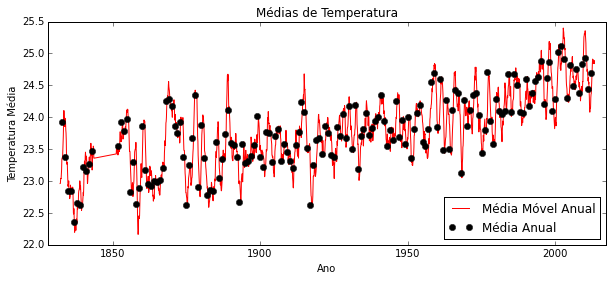

In [175]:
plt.figure(figsize = [10, 4]) #criamos aqui a figura em branco
plt.plot(data_ano, anual_temp, 'r', label='Média Móvel Anual') #aqui preenchemos-na com os dados organizados
plt.plot(danuais, tempuais, 'ok', label='Média Anual', linewidth = 2) #aqui preenchemos-na com os dados organizados
plt.title("Médias de Temperatura") #título
plt.xlabel(u"Ano") #nomeamos o eixo X
plt.ylabel("Temperatura Média") #nomeamos o eixo Y
plt.xlim(1828,2017)
plt.legend(loc='lower right', fontsize='large')

### Resultado esperado

O gráfico final deve ser parecido com o abaixo:

![images/media-anual-temp-rio.png](images/media-anual-temp-rio.png)

## Tarefa Bônus

Salve os dados da média anual em um arquivo CSV (comma separated values) chamado `temp-media-anual.csv`. Os valores devem ser separados por `,`. A primeira coluna deve conter os anos e a segunda as temperaturas. Esse arquivo deve estar presente em seu repositório (dê `git add` nele).